**Dataset:** Power Quality

**Repositorio:** Github

**Enlace:** https://github.com/Jheiden7/Power_Quality/blob/main/Dataset/Depurado/Power%20Quality-Depurado.txt

**Tarea a realizar:** Analítica de datos

**Cantidad de atributos:** 9

**Cantidad de observaciones:** 1614

**Objetivo:** Realizar un análisis exploratorio incial de los datos con el fin de encontrar estadísticas, resúmenes informativos, tendencias, patrones y comportamientos que permitan realizar deducciones sobre estos, además de detectar los rangos donde un valor se podría considerar atípico y analizar en qué casos debería descartarse o no un dato.

**Información de atributos:**

||||
|---|---|---|
|**Variable**|**Tipo**|**Descripción**|
|Date|Categórica|Fecha en MM-DD-YYYY de la toma de los datos.|
|Voltage|Numérica|Voltaje suministrado a la carga, expresado en voltios (V).|
|Current|Numérica|Corriente consumida por la carga, expresada en amperios (A).|
|Power|Numérica|Potencia consumida por la carga, expresada en vatios (W).|
|Energy|Numérica|Energía consumida por la carga, expresada en kilovatios hora (kWh).|
|Frequency|Numérica|Frecuencia de la red eléctrica a la que está conectada la carga, expresada en hercios (Hz).|
|Power Factor|Numérica|Factor de potencia de la carga.|
|Reactive Power|Numérica|Potencia reactiva de la carga, expresada en voltio-amperio reactivo (VAr).|
|Apparent Power|Numérica|Potencia aparente de la carga, expresada en voltio-amperio (VA).|

In [ ]:
!pip install ydata_profiling #Instalación de librería para realizar Data Profiling

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from ydata_profiling import ProfileReport

# Carga de los datos

Se carga el dataset. En este caso es un csv donde el separador es la coma (,), esto es importante debido a que algunos archivos usan como separador el punto y coma (;).

In [4]:
PowerQuality = pd.read_csv('Power Quality.txt', sep=',')
PowerQuality.head()

,Date,Voltage,Current,Power,Energy,Frequency,Power Factor,Reactive Power,Apparent Power
0,2024-04-14 16:07:10,119.8,0.04,3.1,0.02,59.9,0.74,2.82,4.19
1,2024-04-14 16:07:20,119.8,0.04,3.1,0.02,60.0,0.74,2.82,4.19
2,2024-04-14 16:07:31,119.9,0.04,3.1,0.02,60.0,0.74,2.82,4.20
3,2024-04-14 16:07:41,119.9,0.04,3.1,0.02,60.0,0.74,2.82,4.20
4,2024-04-14 16:07:51,120.0,0.04,3.1,0.02,60.0,0.74,2.82,4.20


Se crea una copia del dataset original para tener un respaldo en caso de alguna modificación errónea.

In [5]:
data = PowerQuality.copy()

In [ ]:
#PowerQuality = data.copy()

In [6]:
PowerQuality.info() #Información del dataset (observaciones, variables, tipo de dato, etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1614 non-null   object 
 1   Voltage         1614 non-null   float64
 2   Current         1614 non-null   float64
 3   Power           1614 non-null   float64
 4   Energy          1614 non-null   float64
 5   Frequency       1614 non-null   float64
 6   Power Factor    1614 non-null   float64
 7   Reactive Power  1614 non-null   float64
 8   Apparent Power  1614 non-null   float64
dtypes: float64(8), object(1)
memory usage: 113.6+ KB


A partir de esta descripción, es posible determinar los valores promedios, las desviaciones estándar, máximos y mínimos de cada variable por separado, lo que sirve para un primer acercamiento a grandes rasgos de cómo se compone el dataset.

In [7]:
PowerQuality.describe() #Información estadística de los datos

,Voltage,Current,Power,Energy,Frequency,Power Factor,Reactive Power,Apparent Power
count,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000
mean,119.900434,0.063457,5.972491,0.060192,59.959789,0.779108,3.961239,7.236673
std,0.673164,0.036476,4.496783,0.050989,0.050542,0.072179,1.718925,4.717893
min,117.200000,0.030000,2.900000,0.020000,59.800000,0.710000,2.640000,4.000000
25%,119.500000,0.040000,3.100000,0.030000,59.900000,0.730000,2.820000,4.190000
50%,119.900000,0.040000,3.100000,0.030000,60.000000,0.740000,2.890000,4.210000
75%,120.400000,0.120000,12.800000,0.110000,60.000000,0.890000,6.580000,14.450000
max,121.400000,0.120000,13.200000,0.180000,60.000000,0.900000,6.980000,14.860000


# Análisis exploratorio inicial

## Profile Report

In [8]:
profile = ProfileReport(PowerQuality, title="Power Quality Report", explorative=True) #Se genera un reporte

In [9]:
profile.to_file("PowerQuality.html") #Se guarda el reporte

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Para un primer acercamiento y un análisis rápido, se utiliza un ProfileReport para observar distintos valores estadísticos, tendencias, alertas, correlaciones, etc.

En este caso se observa que se están presentando muchas alertas debido a las altas correlaciones entre las variables, lo cual es normal debido a que la mayoría de estas comparten una relación matemática, por lo que unas surgen a partir de otra. Así que, a pesar de que aparezca como una alerta, realmente no es un problema para los fines de este análisis.

También se observa que no hay presencia de datos duplicados ni de datos faltantes, esto debido a que la base de datos fue depurada previamente y se borraron los registros donde hubo errores en la toma de datos.

In [10]:
profile.to_notebook_iframe() #Se muestra el reporte

## Análisis de atípicos

De la misma forma que en un conjunto de datos se presenten datos duplicados o faltantes, también es posible presenciar datos que se salen de lo normal (atípicos) para determinadas variables o incluso datos que toman valores que, dependiendo del tipo de variable analizada en determinado contexto, no deberían ser posibles (no válidos). Para solucionar esto, se procede a realizar una revisión a partir del establecimiento de ciertos criterios para determinar un umbral donde se puedan considerar que dichos datos son atípicos y/o no válidos.

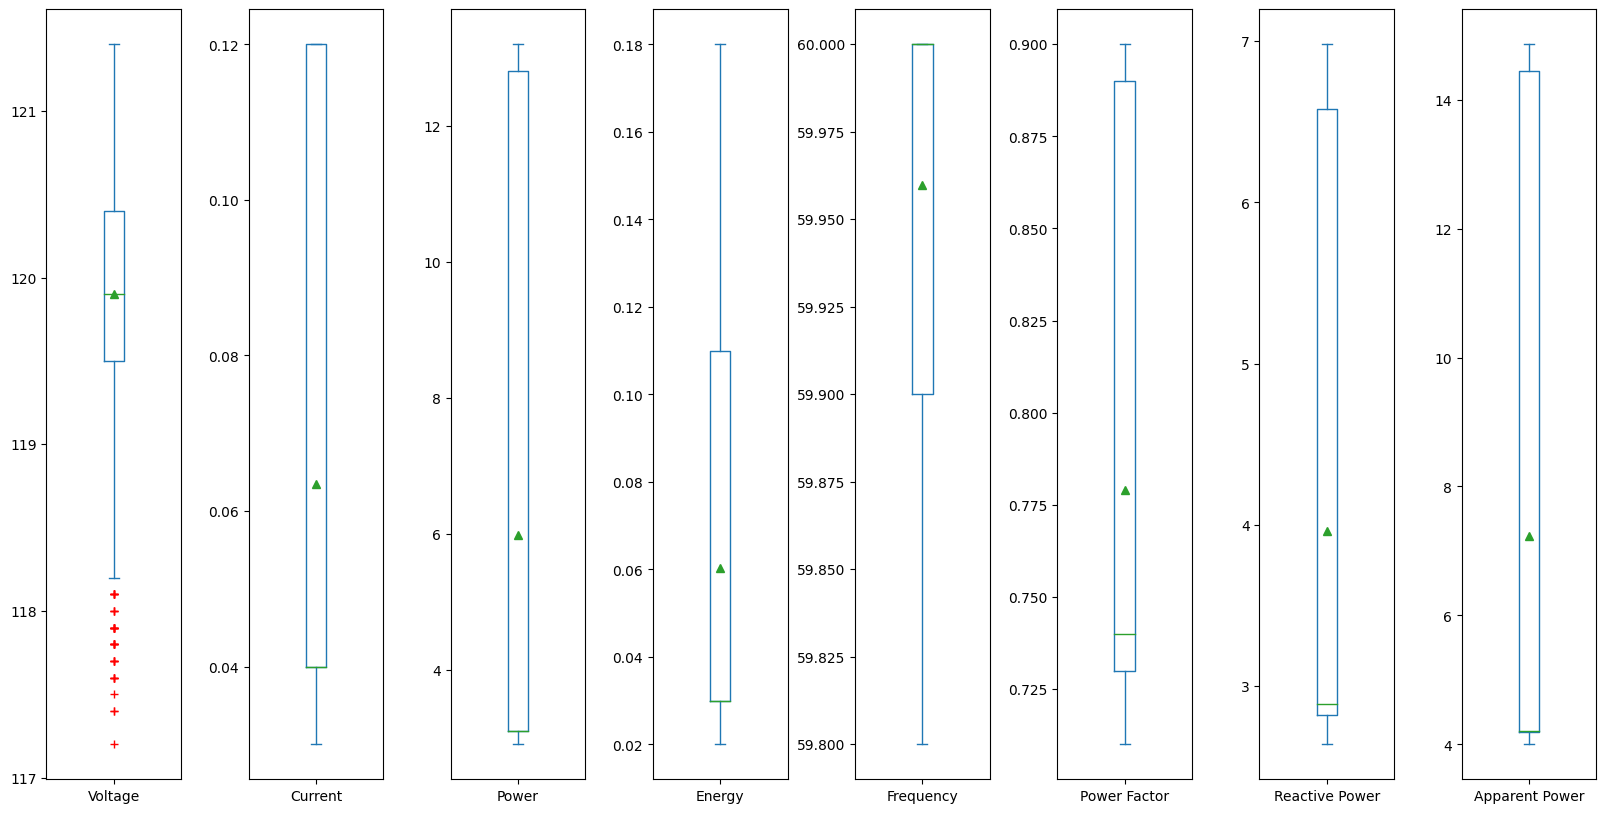

In [15]:
PowerQuality.plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(20,10),
    showmeans=True,
    flierprops=dict(markeredgecolor='r',marker='+'),
)

plt.subplots_adjust(wspace=0.5)
plt.show()

En el diagrama de caja anterior, se puede observar que únicamente existe la aparición de aparentes datos atípicos para la variable de *Voltage*, para todos los valores debajo de 118V. No obstante, se podría decir que en este análisis, esos son datos atípicos, pero en la vida real, son valores que se considerarían normales.

Para las demás variables, no hay presencia de valores atípicos, por lo que si se quisiera usar este análisis para generar alertas o detectar cuáles son los "estados saludables" de la calidad de la energía, se podrían tener en cuenta los rangos dados por el diagrama anterior.

## Histogramas

Con esto se busca observar la distribución de las variables y observar cuáles son los rangos de valores que aparecen con mayor frecuencia en el dataset.

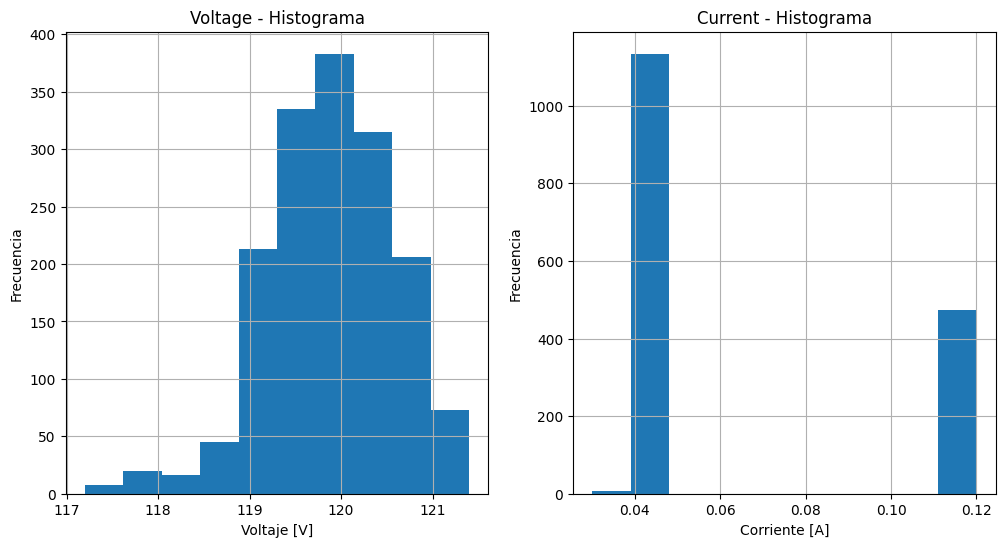

In [26]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.hist(PowerQuality['Voltage'])
plt.title('Voltage - Histograma')
plt.xlabel('Voltaje [V]')
plt.ylabel('Frecuencia')
plt.grid()
plt.subplot(1, 2, 2)
plt.hist(PowerQuality['Current'])
plt.title('Current - Histograma')
plt.xlabel('Corriente [A]')
plt.ylabel('Frecuencia')
plt.grid()

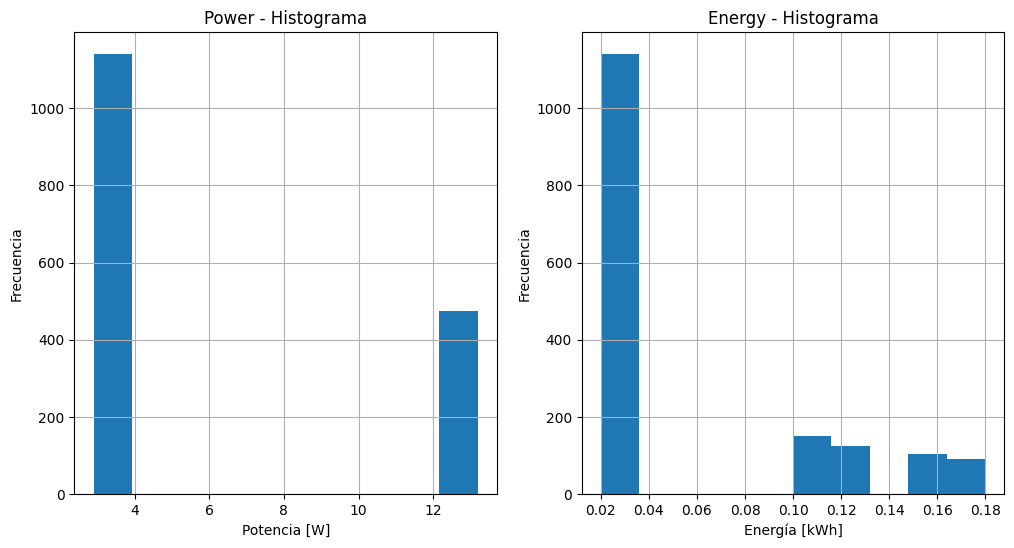

In [27]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.hist(PowerQuality['Power'])
plt.title('Power - Histograma')
plt.xlabel('Potencia [W]')
plt.ylabel('Frecuencia')
plt.grid()
plt.subplot(1, 2, 2)
plt.hist(PowerQuality['Energy'])
plt.title('Energy - Histograma')
plt.xlabel('Energía [kWh]')
plt.ylabel('Frecuencia')
plt.grid()

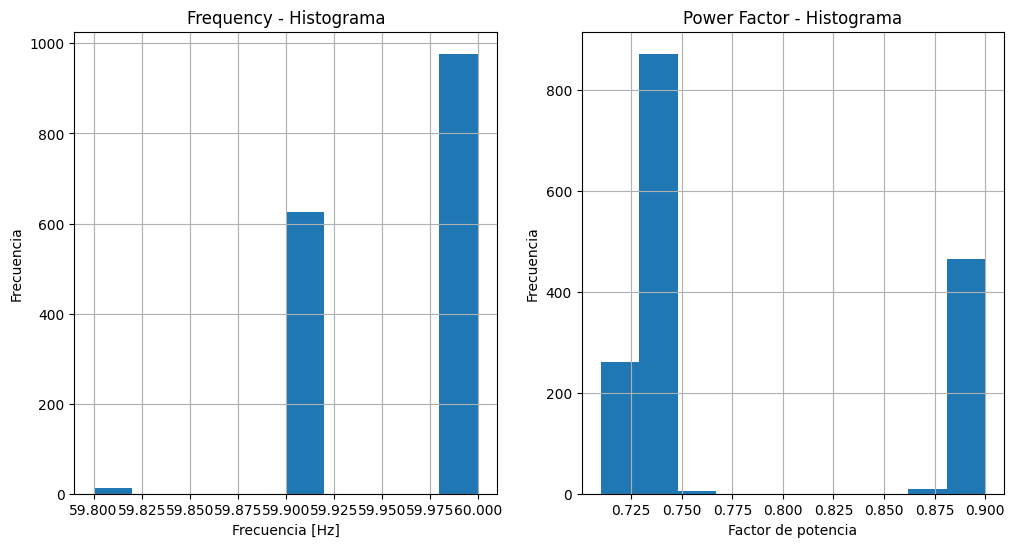

In [29]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.hist(PowerQuality['Frequency'])
plt.title('Frequency - Histograma')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Frecuencia')
plt.grid()
plt.subplot(1, 2, 2)
plt.hist(PowerQuality['Power Factor'])
plt.title('Power Factor - Histograma')
plt.xlabel('Factor de potencia')
plt.ylabel('Frecuencia')
plt.grid()

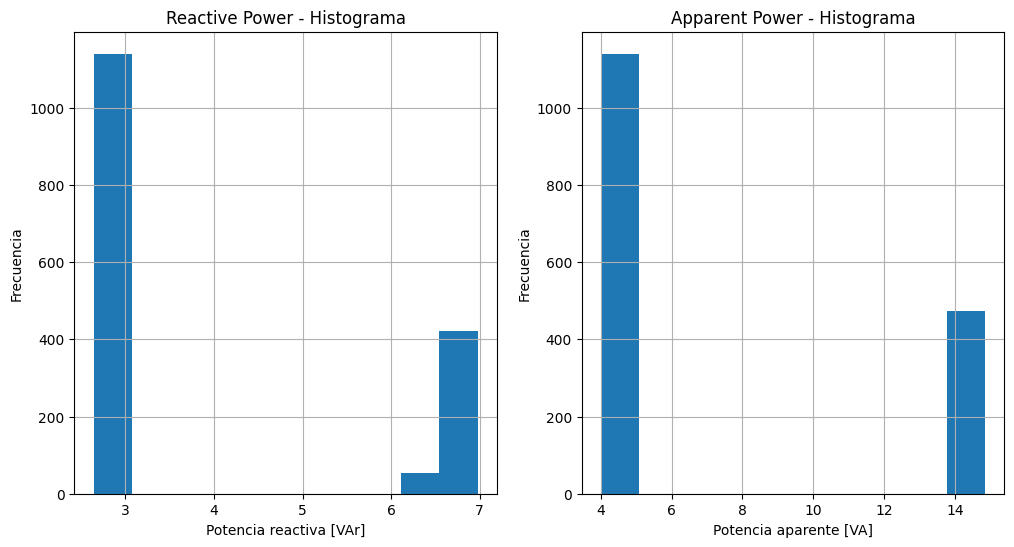

In [30]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.hist(PowerQuality['Reactive Power'])
plt.title('Reactive Power - Histograma')
plt.xlabel('Potencia reactiva [VAr]')
plt.ylabel('Frecuencia')
plt.grid()
plt.subplot(1, 2, 2)
plt.hist(PowerQuality['Apparent Power'])
plt.title('Apparent Power - Histograma')
plt.xlabel('Potencia aparente [VA]')
plt.ylabel('Frecuencia')
plt.grid()